#MACHINE LEARNING ARIMA STOCK PREDICTION

In [1]:
data_files=['Amazon','AMD','Apple','Cisco','Meta','Microsoft','Netflix','Qualcomm','Starbucks','Tesla']

In [3]:
data=[]
import pandas as pd
for i in data_files:
    temp=pd.read_csv('Dataset/{}.csv'.format(i),parse_dates=True,index_col=0,usecols=['Date','Close/Last'])
    temp.sort_index(ascending=True,inplace=True)
    temp.rename(columns={'Close/Last':"Close"},inplace=True)
    temp.name=i
    data.append(temp)

In [4]:
from statsmodels.tsa.stattools import adfuller
def stationarity(f):
  dftest = adfuller(f,autolag='AIC')
  #print(dftest)
  return dftest[1]


In [5]:
for i in range(len(data)):
  print(stationarity(data[i]))

0.7074720815044315
0.7913957555049318
0.9627326346798291
0.5110969208809176
0.4437723346777324
0.9280843303412873
0.5545607942572077
0.5949280513024119
0.6698212960825715
0.7059665058638838


In [6]:
new_data = []
for i in range(len(data)):
  print(stationarity(data[i].diff().dropna()))
  new_data.append(data[i].diff().dropna())


1.105535858084933e-18
1.195605986059157e-17
6.099367705740734e-19
2.5436195595036436e-20
2.0824068952697948e-17
6.932056621390492e-30
2.757601210519634e-19
1.257641546143027e-17
5.734626586865041e-28
1.4245550541585897e-16


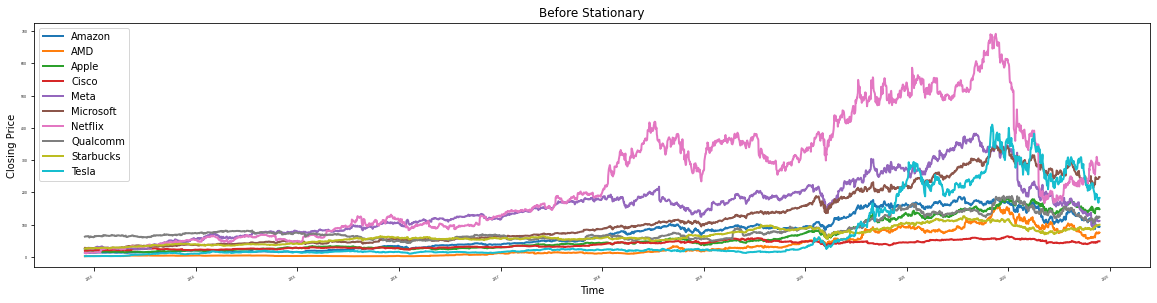

In [7]:
import matplotlib.pyplot as plt
for x in range(len(data)):
  data[x].Close.plot(linewidth=2,fontsize=3,figsize=(20,5),label=data_files[x])
  plt.ylabel('Closing Price')
  plt.xlabel('Time')
  plt.legend()
  plt.title("Before Stationary")

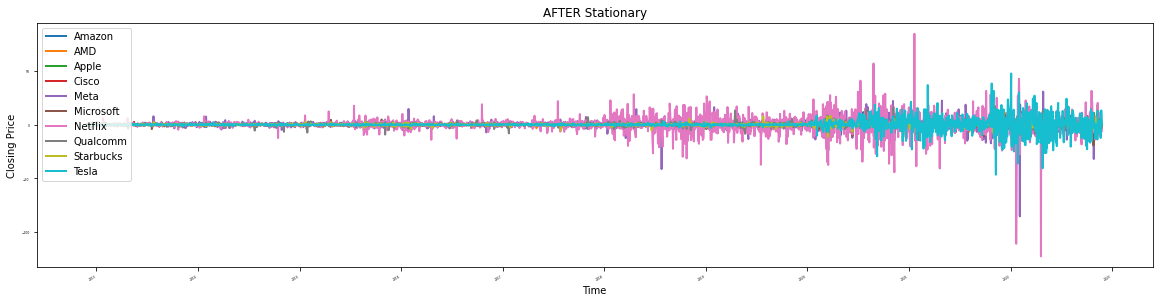

In [8]:
for x in range(len(data)):
  new_data[x].Close.plot(linewidth=2,fontsize=3,figsize=(20,5),label=data_files[x])
  plt.ylabel('Closing Price')
  plt.xlabel('Time')
  plt.title("AFTER Stationary")
  plt.legend()

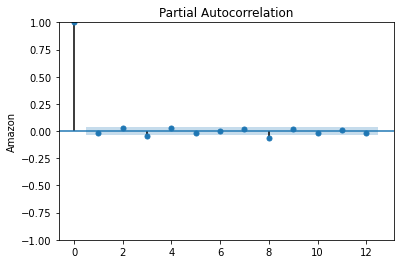

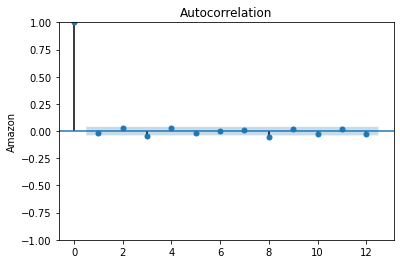

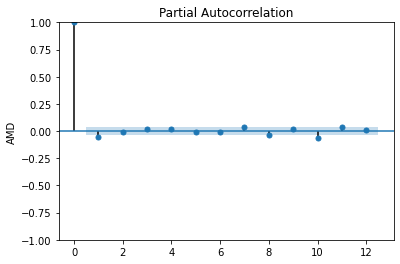

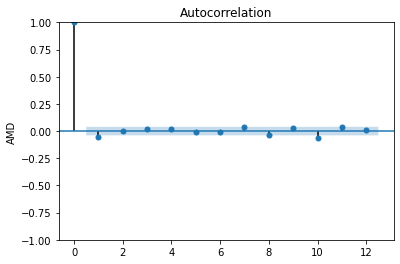

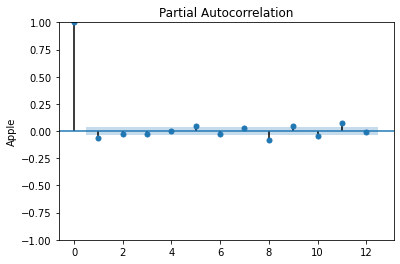

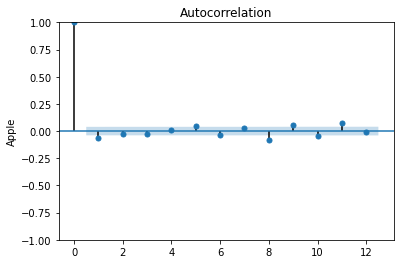

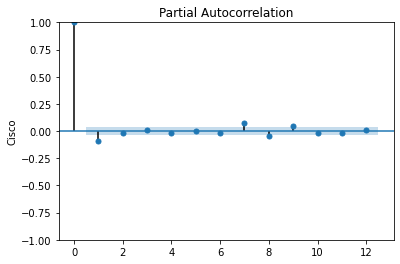

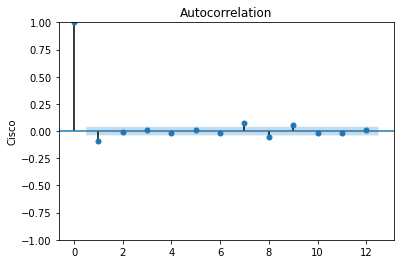

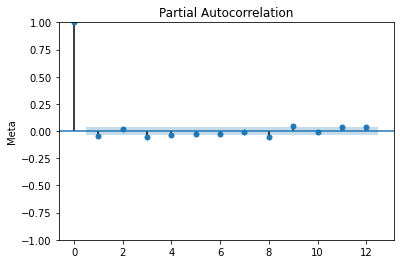

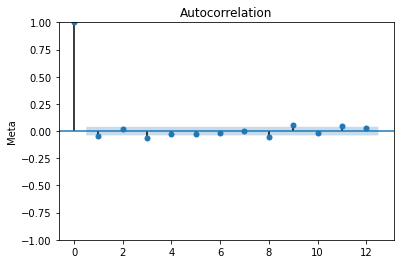

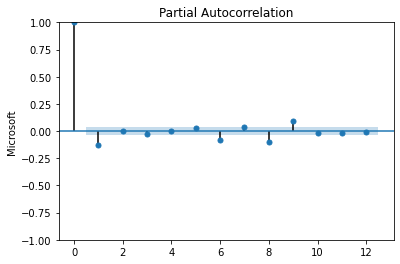

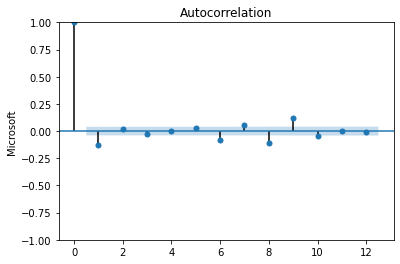

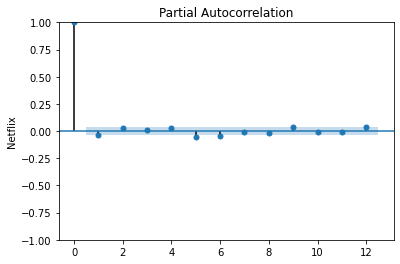

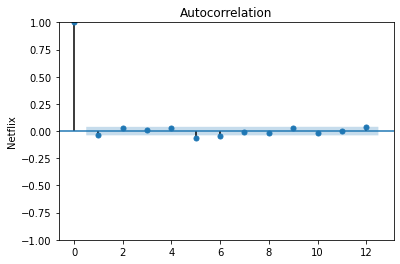

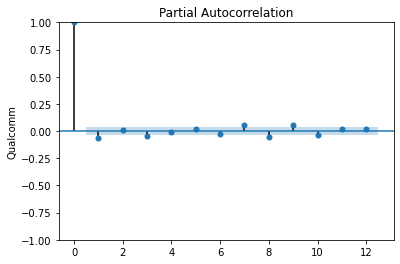

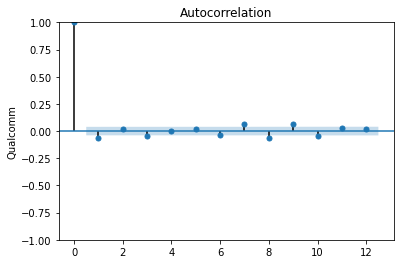

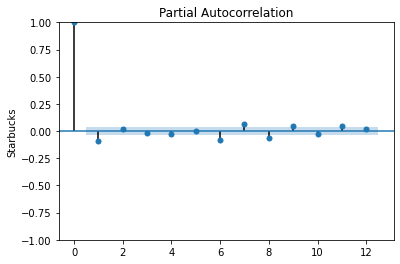

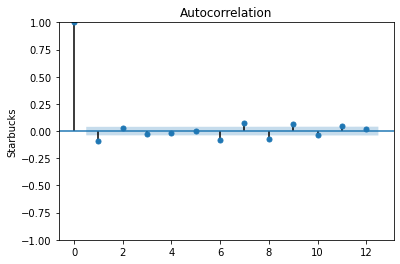

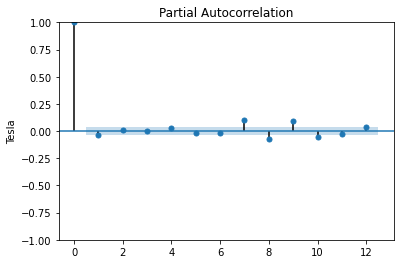

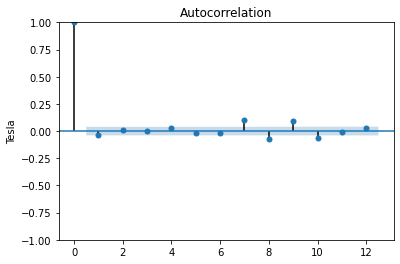

In [9]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt 
for i in range(len(data)):
  
  plot_pacf(new_data[i], lags = 12, method = "ols")
  plt.ylabel(data_files[i])
  plt.show()
  plot_acf(new_data[i],lags=12)
  plt.ylabel(data_files[i])
  plt.show()
  #8,1,3

In [13]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 45.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 87.7 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [10]:
import pmdarima as pm

In [11]:
auto_ar = []
for i in range(len(data)):
  model_arima = pm.auto_arima(new_data[i],trace=True,error_action='ignore',test='adf',start_p=1,start_q=1,max=12,d=1,
                            supress_warnings=True,stepwise=False,seasonal=False)
  auto_ar.append(model_arima)
auto_ar

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12298.525, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.28 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.69 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=3.55 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=4.19 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=6.39 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11503.373, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.87 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.43 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=5.11 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=7.88 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=11276.542, Time=0.34 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.35 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=4.11 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=3.60 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=11067.801, Time=0.50 sec


[ARIMA(order=(5, 1, 0), scoring_args={}, suppress_warnings=True),
 ARIMA(order=(5, 1, 0), scoring_args={}, suppress_warnings=True),
 ARIMA(order=(5, 1, 0), scoring_args={}, suppress_warnings=True),
 ARIMA(order=(5, 1, 0), scoring_args={}, suppress_warnings=True),
 ARIMA(order=(5, 1, 0), scoring_args={}, suppress_warnings=True),
 ARIMA(order=(5, 1, 0), scoring_args={}, suppress_warnings=True),
 ARIMA(order=(5, 1, 0), scoring_args={}, suppress_warnings=True),
 ARIMA(order=(5, 1, 0), scoring_args={}, suppress_warnings=True),
 ARIMA(order=(5, 1, 0), scoring_args={}, suppress_warnings=True),
 ARIMA(order=(5, 1, 0), scoring_args={}, suppress_warnings=True)]

In [13]:
auto_ar

[ARIMA(order=(5, 1, 0), scoring_args={}, suppress_warnings=True),
 ARIMA(order=(5, 1, 0), scoring_args={}, suppress_warnings=True),
 ARIMA(order=(5, 1, 0), scoring_args={}, suppress_warnings=True),
 ARIMA(order=(5, 1, 0), scoring_args={}, suppress_warnings=True),
 ARIMA(order=(5, 1, 0), scoring_args={}, suppress_warnings=True),
 ARIMA(order=(5, 1, 0), scoring_args={}, suppress_warnings=True),
 ARIMA(order=(5, 1, 0), scoring_args={}, suppress_warnings=True),
 ARIMA(order=(5, 1, 0), scoring_args={}, suppress_warnings=True),
 ARIMA(order=(5, 1, 0), scoring_args={}, suppress_warnings=True),
 ARIMA(order=(5, 1, 0), scoring_args={}, suppress_warnings=True)]

In [12]:
from statsmodels.tsa.arima.model import ARIMA
for i in range(len(data)):
  model = ARIMA(new_data[i],order=(5,1,0))
  model_fit = model.fit()
  print(new_data[i],model_fit.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


            Close
Date             
2012-11-29   0.20
2012-11-30   0.04
2012-12-03  -0.08
2012-12-04   0.10
2012-12-05   0.08
...           ...
2022-11-18  -0.71
2022-11-21  -1.68
2022-11-22   0.74
2022-11-23   0.93
2022-11-25  -0.72

[2516 rows x 1 columns]                                SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2516
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -5447.670
Date:                Mon, 09 Jan 2023   AIC                          10907.341
Time:                        03:05:14   BIC                          10942.321
Sample:                             0   HQIC                         10920.036
                               - 2516                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


            Close
Date             
2012-11-29   0.08
2012-11-30   0.16
2012-12-03   0.16
2012-12-04  -0.10
2012-12-05   0.03
...           ...
2022-11-18  -0.33
2022-11-21  -1.11
2022-11-22   2.79
2022-11-23   1.15
2022-11-25  -1.26

[2516 rows x 1 columns]                                SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2516
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -5108.514
Date:                Mon, 09 Jan 2023   AIC                          10229.029
Time:                        03:05:14   BIC                          10264.009
Sample:                             0   HQIC                         10241.724
                               - 2516                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


            Close
Date             
2012-11-29   0.23
2012-11-30  -0.15
2012-12-03   0.04
2012-12-04  -0.37
2012-12-05  -1.33
...           ...
2022-11-18   0.57
2022-11-21  -3.28
2022-11-22   2.17
2022-11-23   0.89
2022-11-25  -2.96

[2516 rows x 1 columns]                                SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2516
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -4894.210
Date:                Mon, 09 Jan 2023   AIC                           9800.420
Time:                        03:05:15   BIC                           9835.400
Sample:                             0   HQIC                          9813.115
                               - 2516                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


            Close
Date             
2012-11-29   0.18
2012-11-30  -0.10
2012-12-03   0.12
2012-12-04   0.14
2012-12-05   0.04
...           ...
2022-11-18   1.20
2022-11-21  -0.17
2022-11-22   0.76
2022-11-23   0.19
2022-11-25  -0.17

[2516 rows x 1 columns]                                SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2516
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2635.745
Date:                Mon, 09 Jan 2023   AIC                           5283.489
Time:                        03:05:15   BIC                           5318.470
Sample:                             0   HQIC                          5296.185
                               - 2516                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


            Close
Date             
2012-11-29   0.96
2012-11-30   0.68
2012-12-03  -0.96
2012-12-04   0.42
2012-12-05   0.25
...           ...
2022-11-18   0.60
2022-11-21  -2.19
2022-11-22   1.58
2022-11-23   0.80
2022-11-25  -0.83

[2516 rows x 1 columns]                                SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2516
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -7435.819
Date:                Mon, 09 Jan 2023   AIC                          14883.638
Time:                        03:05:16   BIC                          14918.618
Sample:                             0   HQIC                         14896.333
                               - 2516                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


            Close
Date             
2012-11-29  -0.41
2012-11-30  -0.33
2012-12-03  -0.19
2012-12-04  -0.06
2012-12-05   0.30
...           ...
2022-11-18  -0.46
2022-11-21   0.83
2022-11-22   2.98
2022-11-23   2.55
2022-11-25  -0.09

[2516 rows x 1 columns]                                SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2516
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -6330.246
Date:                Mon, 09 Jan 2023   AIC                          12672.491
Time:                        03:05:16   BIC                          12707.471
Sample:                             0   HQIC                         12685.187
                               - 2516                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


            Close
Date             
2012-11-29  -0.12
2012-11-30   0.04
2012-12-03  -0.81
2012-12-04   1.52
2012-12-05  -0.47
...           ...
2022-11-18  -7.30
2022-11-21  -2.93
2022-11-22   1.64
2022-11-23   4.81
2022-11-25  -5.96

[2516 rows x 1 columns]                                SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2516
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -9015.444
Date:                Mon, 09 Jan 2023   AIC                          18042.888
Time:                        03:05:17   BIC                          18077.868
Sample:                             0   HQIC                         18055.584
                               - 2516                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


            Close
Date             
2012-11-29   0.70
2012-11-30   0.27
2012-12-03  -0.25
2012-12-04   0.10
2012-12-05   0.16
...           ...
2022-11-18   0.99
2022-11-21  -3.65
2022-11-22   3.45
2022-11-23   1.50
2022-11-25  -1.70

[2516 rows x 1 columns]                                SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2516
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -5685.655
Date:                Mon, 09 Jan 2023   AIC                          11383.310
Time:                        03:05:17   BIC                          11418.291
Sample:                             0   HQIC                         11396.006
                               - 2516                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


            Close
Date             
2012-11-29   0.21
2012-11-30   0.04
2012-12-03  -0.05
2012-12-04  -0.33
2012-12-05  -0.16
...           ...
2022-11-18   0.98
2022-11-21   0.37
2022-11-22   0.11
2022-11-23   1.09
2022-11-25   0.04

[2516 rows x 1 columns]                                SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2516
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -4204.455
Date:                Mon, 09 Jan 2023   AIC                           8420.909
Time:                        03:05:18   BIC                           8455.889
Sample:                             0   HQIC                          8433.605
                               - 2516                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


            Close
Date             
2012-11-29   0.03
2012-11-30   0.00
2012-12-03   0.06
2012-12-04  -0.05
2012-12-05  -0.01
...           ...
2022-11-18  -2.98
2022-11-21 -12.32
2022-11-22   2.04
2022-11-23  13.29
2022-11-25  -0.34

[2516 rows x 1 columns]                                SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2516
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -7751.948
Date:                Mon, 09 Jan 2023   AIC                          15515.896
Time:                        03:05:18   BIC                          15550.876
Sample:                             0   HQIC                         15528.592
                               - 2516                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------

In [19]:
from statsmodels.tsa.arima.model import ARIMA
for i in range(len(data)):
  model = ARIMA(new_data[i],order=(1,1,1))
  model_fit = model.fit()
  print(new_data[i],model_fit.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


            Close
Date             
2012-11-29   0.20
2012-11-30   0.04
2012-12-03  -0.08
2012-12-04   0.10
2012-12-05   0.08
...           ...
2022-11-18  -0.71
2022-11-21  -1.68
2022-11-22   0.74
2022-11-23   0.93
2022-11-25  -0.72

[2516 rows x 1 columns]                                SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2516
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5257.051
Date:                Mon, 09 Jan 2023   AIC                          10520.101
Time:                        03:20:02   BIC                          10537.591
Sample:                             0   HQIC                         10526.449
                               - 2516                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


            Close
Date             
2012-11-29   0.08
2012-11-30   0.16
2012-12-03   0.16
2012-12-04  -0.10
2012-12-05   0.03
...           ...
2022-11-18  -0.33
2022-11-21  -1.11
2022-11-22   2.79
2022-11-23   1.15
2022-11-25  -1.26

[2516 rows x 1 columns]                                SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2516
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4915.588
Date:                Mon, 09 Jan 2023   AIC                           9837.176
Time:                        03:20:03   BIC                           9854.666
Sample:                             0   HQIC                          9843.524
                               - 2516                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


            Close
Date             
2012-11-29   0.23
2012-11-30  -0.15
2012-12-03   0.04
2012-12-04  -0.37
2012-12-05  -1.33
...           ...
2022-11-18   0.57
2022-11-21  -3.28
2022-11-22   2.17
2022-11-23   0.89
2022-11-25  -2.96

[2516 rows x 1 columns]                                SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2516
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4704.490
Date:                Mon, 09 Jan 2023   AIC                           9414.979
Time:                        03:20:04   BIC                           9432.469
Sample:                             0   HQIC                          9421.327
                               - 2516                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


            Close
Date             
2012-11-29   0.18
2012-11-30  -0.10
2012-12-03   0.12
2012-12-04   0.14
2012-12-05   0.04
...           ...
2022-11-18   1.20
2022-11-21  -0.17
2022-11-22   0.76
2022-11-23   0.19
2022-11-25  -0.17

[2516 rows x 1 columns]                                SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2516
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2431.418
Date:                Mon, 09 Jan 2023   AIC                           4868.836
Time:                        03:20:05   BIC                           4886.326
Sample:                             0   HQIC                          4875.184
                               - 2516                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


            Close
Date             
2012-11-29   0.96
2012-11-30   0.68
2012-12-03  -0.96
2012-12-04   0.42
2012-12-05   0.25
...           ...
2022-11-18   0.60
2022-11-21  -2.19
2022-11-22   1.58
2022-11-23   0.80
2022-11-25  -0.83

[2516 rows x 1 columns]                                SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2516
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -7215.287
Date:                Mon, 09 Jan 2023   AIC                          14436.574
Time:                        03:20:06   BIC                          14454.064
Sample:                             0   HQIC                         14442.922
                               - 2516                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


            Close
Date             
2012-11-29  -0.41
2012-11-30  -0.33
2012-12-03  -0.19
2012-12-04  -0.06
2012-12-05   0.30
...           ...
2022-11-18  -0.46
2022-11-21   0.83
2022-11-22   2.98
2022-11-23   2.55
2022-11-25  -0.09

[2516 rows x 1 columns]                                SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2516
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6114.299
Date:                Mon, 09 Jan 2023   AIC                          12234.598
Time:                        03:20:07   BIC                          12252.088
Sample:                             0   HQIC                         12240.946
                               - 2516                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


            Close
Date             
2012-11-29  -0.12
2012-11-30   0.04
2012-12-03  -0.81
2012-12-04   1.52
2012-12-05  -0.47
...           ...
2022-11-18  -7.30
2022-11-21  -2.93
2022-11-22   1.64
2022-11-23   4.81
2022-11-25  -5.96

[2516 rows x 1 columns]                                SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2516
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -8808.293
Date:                Mon, 09 Jan 2023   AIC                          17622.587
Time:                        03:20:08   BIC                          17640.077
Sample:                             0   HQIC                         17628.934
                               - 2516                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


            Close
Date             
2012-11-29   0.70
2012-11-30   0.27
2012-12-03  -0.25
2012-12-04   0.10
2012-12-05   0.16
...           ...
2022-11-18   0.99
2022-11-21  -3.65
2022-11-22   3.45
2022-11-23   1.50
2022-11-25  -1.70

[2516 rows x 1 columns]                                SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2516
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5481.226
Date:                Mon, 09 Jan 2023   AIC                          10968.451
Time:                        03:20:09   BIC                          10985.941
Sample:                             0   HQIC                         10974.799
                               - 2516                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


            Close
Date             
2012-11-29   0.21
2012-11-30   0.04
2012-12-03  -0.05
2012-12-04  -0.33
2012-12-05  -0.16
...           ...
2022-11-18   0.98
2022-11-21   0.37
2022-11-22   0.11
2022-11-23   1.09
2022-11-25   0.04

[2516 rows x 1 columns]                                SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2516
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3975.774
Date:                Mon, 09 Jan 2023   AIC                           7957.548
Time:                        03:20:10   BIC                           7975.038
Sample:                             0   HQIC                          7963.896
                               - 2516                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


            Close
Date             
2012-11-29   0.03
2012-11-30   0.00
2012-12-03   0.06
2012-12-04  -0.05
2012-12-05  -0.01
...           ...
2022-11-18  -2.98
2022-11-21 -12.32
2022-11-22   2.04
2022-11-23  13.29
2022-11-25  -0.34

[2516 rows x 1 columns]                                SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2516
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -7558.209
Date:                Mon, 09 Jan 2023   AIC                          15122.419
Time:                        03:20:11   BIC                          15139.909
Sample:                             0   HQIC                         15128.767
                               - 2516                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------

In [20]:
new_data[8].shape

(2516, 1)

In [26]:
from sklearn import metrics 
import numpy as np

def arima(i):
  import warnings 
  warnings.filterwarnings('ignore')
  new_data[i].shape
  train = new_data[i][:2012 ]
  test  = new_data[i][2012:]
  model = ARIMA(train,order=(1,1,1))
  fitted = model.fit()

  fc = fitted.forecast(len(test),alpha=0.05)
  f_series = pd.DataFrame(fc)
  new = test.index
  f_series['date'] = new 
  f_series.set_index('date',inplace=True)
  plt.plot(train,label="Train")
  plt.plot(test,label="test")
  plt.plot(f_series,label="predicted")
  plt.ylabel("Price")
  plt.xlabel("dates")
  plt.legend()
  plt.show()
  print('MAE',metrics.mean_absolute_error(test['Close'],f_series['predicted_mean']))
  print('MSE',metrics.mean_squared_error(test['Close'],f_series['predicted_mean']))
  print('rmse',np.sqrt(metrics.mean_squared_error(test['Close'],f_series['predicted_mean'])))
  print("residual error",np.mean(test['Close'] - f_series['predicted_mean']))
  

  

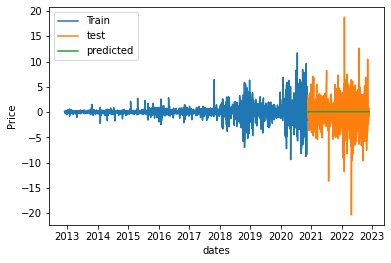

MAE 2.41454338998443
MSE 11.17677359515917
rmse 3.343168197258279
residual error -0.23721952634724322


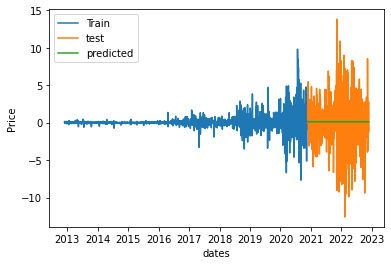

MAE 2.454120145199978
MSE 11.160798576761824
rmse 3.3407781394103115
residual error -0.13818803972356186


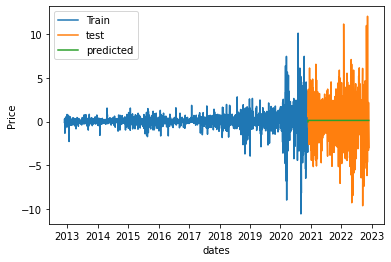

MAE 2.1464603541293292
MSE 8.098060453787479
rmse 2.845709130214731
residual error -0.06759607857633923


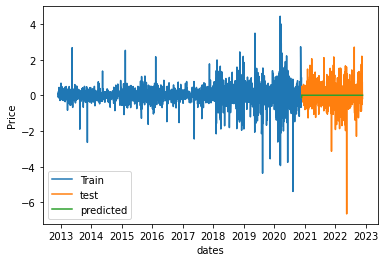

MAE 0.5506053129825531
MSE 0.6013821235335393
rmse 0.775488312957416
residual error -5.314511815418092e-05


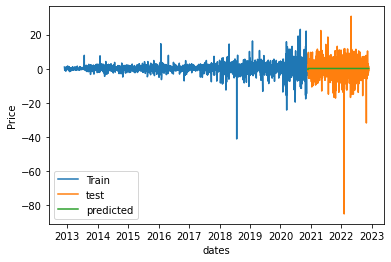

MAE 4.757731164844729
MSE 51.8512578862905
rmse 7.2007817552187
residual error -0.45235726515688


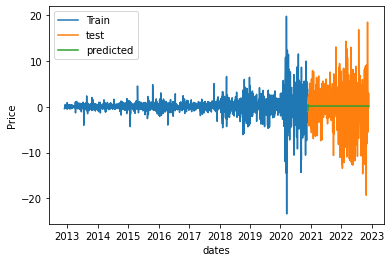

MAE 3.5758679688221315
MSE 23.12867488820738
rmse 4.809228096920272
residual error -0.08602176550968088


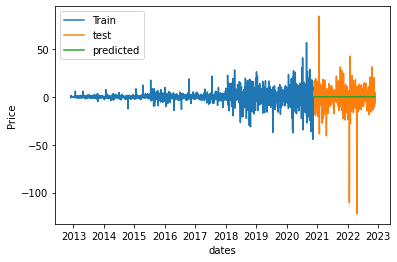

MAE 8.017529721544284
MSE 164.05368797507828
rmse 12.808344466599822
residual error -0.6244491130047959


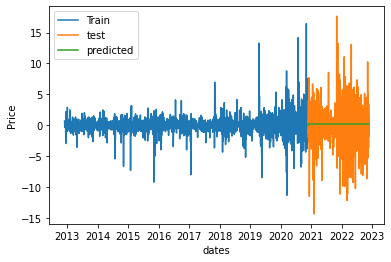

MAE 2.744168852642803
MSE 14.078612705793349
rmse 3.752147745730883
residual error -0.25021565478360613


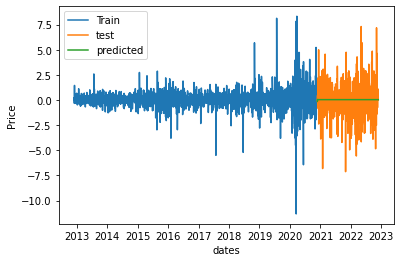

MAE 1.2696907678826
MSE 3.070390992845652
rmse 1.7522531189430517
residual error -0.033232729949105845


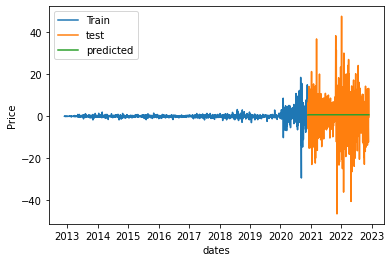

MAE 7.470171633514935
MSE 107.28741278353793
rmse 10.357963737315261
residual error -0.7591535568389743


In [27]:
for i in range(len(new_data)):
  arima(i)

In [35]:
from sklearn import metrics 
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

def arima(i):
  import warnings 
  warnings.filterwarnings('ignore')
  new_data[i].shape
  train = new_data[i][:2012 ]
  test  = new_data[i][2012:]
  model = ARIMA(train,order=(5,1,0))
  fitted = model.fit()

  fc = fitted.forecast(len(test),alpha=0.05)
  f_series = pd.DataFrame(fc)
  new = test.index
  f_series['date'] = new 
  f_series.set_index('date',inplace=True)
  plt.plot(train,label="Train")
  plt.plot(test,label="test")
  plt.plot(f_series,label="predicted")
  plt.ylabel("Price")
  plt.xlabel("dates")
  plt.legend()
  plt.show()
  print('MAE',metrics.mean_absolute_error(test['Close'],f_series['predicted_mean']))
  print('MSE',metrics.mean_squared_error(test['Close'],f_series['predicted_mean']))
  print('rmse',np.sqrt(metrics.mean_squared_error(test['Close'],f_series['predicted_mean'])))
  print("residual error",np.mean(test['Close'] - f_series['predicted_mean']))
  print("mape",np.mean(np.abs((test['Close'] - f_series['predicted_mean']) / test['Close'])) * 100)
  

  

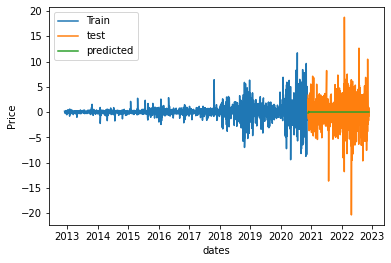

MAE 2.412787247011339
MSE 11.150573812871894
rmse 3.339247492006529
residual error -0.16431558965136445
mape inf


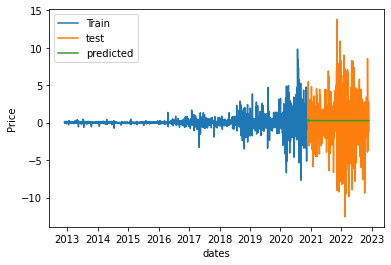

MAE 2.472002733924972
MSE 11.229412031947504
rmse 3.3510314877582847
residual error -0.30340484105429555
mape inf


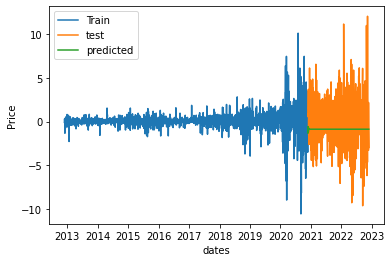

MAE 2.3040281811492087
MSE 8.975897485848185
rmse 2.9959802212044364
residual error 0.9353839135284348
mape inf


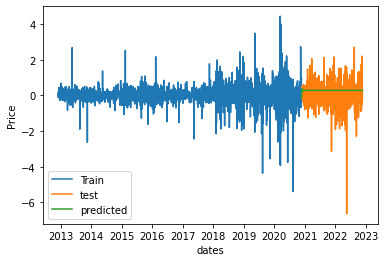

MAE 0.6070432231414403
MSE 0.6764796956796638
rmse 0.8224838573976171
residual error -0.2736336171205864
mape inf


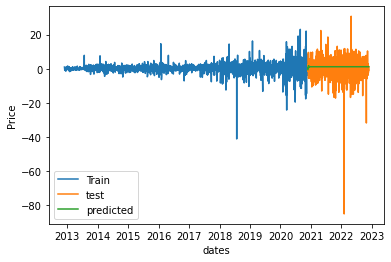

MAE 4.893054972901924
MSE 53.84096423826873
rmse 7.337640236361328
residual error -1.4733903425228483
mape 201.11867823307927


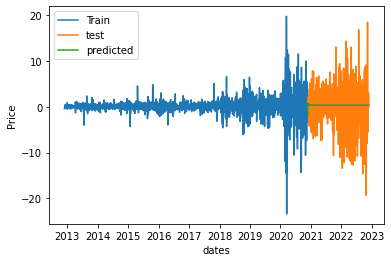

MAE 3.5894850026424643
MSE 23.21189938660031
rmse 4.817872911005469
residual error -0.28875560664018596
mape inf


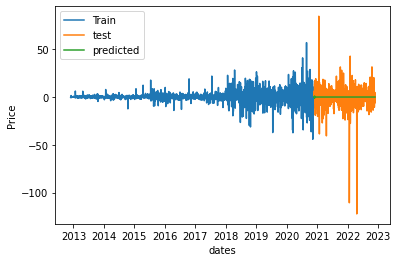

MAE 8.01140668877506
MSE 163.77097500636637
rmse 12.797303427143015
residual error -0.36767702400684904
mape 99.90077885187209


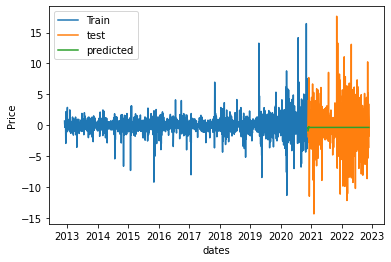

MAE 2.7509362204152334
MSE 14.110953830303455
rmse 3.756454955180942
residual error 0.30071732532579576
mape 117.62901788020959


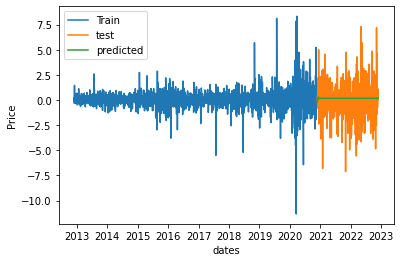

MAE 1.281467288096684
MSE 3.097499998783873
rmse 1.7599715903343078
residual error -0.1664938046727618
mape 131.26053582486477


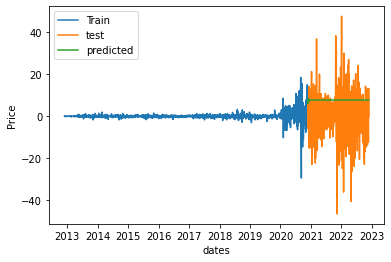

MAE 10.14909069193923
MSE 166.8255522585893
rmse 12.916096633990833
residual error -7.749241591336638
mape 503.94663004733627


In [36]:
for i in range(len(new_data)):
  arima(i)

In [ ]:
# mape error metrics is ignored as points are closer to zero np.mean(np.abs((y_true - y_pred) / y_true)) 
#* 100 when y_true is 0 result turns to inf

0.3273809523809524